In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn. metrics import confusion_matrix, ConfusionMatrixDisplay , precision_score, recall_score, f1_score, r2_score, roc_curve, roc_auc_score, classification_report

### Loading Data

In [3]:
feature_matrix = np.load("../all-sub-features/rest-2-all.npy")

In [5]:
display(feature_matrix.shape)

(24354, 131)

In [6]:
labels = feature_matrix[:, -1]
display(labels.shape)

(24354,)

In [7]:
print((np.unique(labels)))

[0. 1.]


In [8]:
data = feature_matrix[:, :-1]
display(data.shape)
for i in range(data.shape[0]):
        for j in range(data.shape[1]):
            if np.isnan(data[i,j]):
                  display([i,j])

(24354, 130)

In [10]:
fold = StratifiedKFold(n_splits=10)

In [11]:
for train_index, test_index in fold.split(data, labels):
    x_train, x_test, y_train, y_test = [data[i] for i in train_index], [data[i] for i in test_index], [labels[i] for i in train_index], [labels[i] for i in test_index]


# x_train, x_test, y_train, y_test = train_test_split(data,labels,test_size=0.3)

In [12]:
print(len(np.unique(y_test)))

2


### Plot multiple ROC plots

In [24]:
def multi_roc_plot_mpl(models, x_train= x_train, y_train= y_train, x_test=x_test, y_test= y_test):

  tprs = []
  fprs = []
  aucs = []

  fig, ax = plt.subplots()

  for i, model in enumerate(models):
    # Model predictions and ROC curve
    model.fit(x_train, y_train)
    probs = model.predict_proba(x_test)[:, 1]

    fpr, tpr, _ = roc_curve(y_test, probs) 
    tprs.append(tpr)
    fprs.append(fpr)
    
    roc_auc = roc_auc_score(y_test, probs)
    aucs.append(roc_auc)
    
    ax.plot(fpr, tpr, lw=2, color=f'C{i}')

  # Remove mean TPR plot

  # Add diagonal reference line
  ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='black')

  # Rest of code to set labels, legend, etc

  ax.set_xlabel('False Positive Rate')
  ax.set_ylabel('True Positive Rate')
  ax.set_title('ROC Curve')
  
  ax.legend(labels=[f'RFC - AUC:{aucs[0]:.2f}', f'ETC - AUC:{aucs[1]:.2f}', f'XGB - AUC:{aucs[2]:.2f}'], 
            loc='lower right',
            fontsize=10
          )
            
  fig.tight_layout()
  plt.show()

### XGB classifier

In [25]:
from xgboost import XGBClassifier
xgb = XGBClassifier()

### ETC 

In [26]:
from sklearn.ensemble import ExtraTreesClassifier
etc = ExtraTreesClassifier(n_estimators=50)

### RFC

In [27]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=50)

### XGB,ETC,RFC multi-roc plot

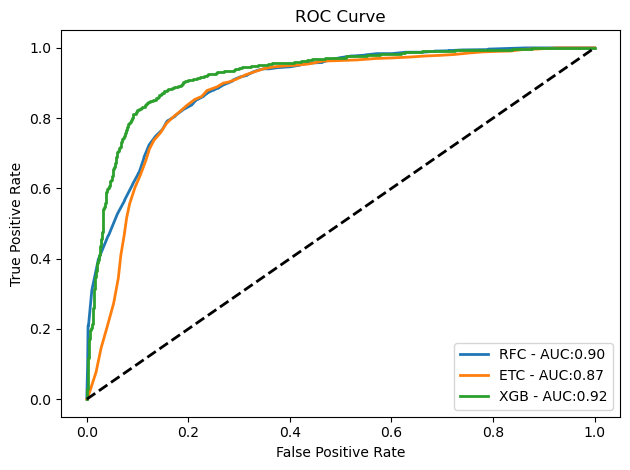

In [28]:
multi_roc_plot_mpl([rfc, etc, xgb])